# Visualisation of Hollstein's manually labeled data sample for pixel level classification

Source: https://gitext.gfz-potsdam.de/hollstei/sentinel2_manual_classification_clouds

Data description:
* Dataset contains 5647725 manually classified pixels.
* Pixels were classified into following categories: clear, water, shadow, cirrus, cloud and snow. Values are:
    * 10 = clear
    * 20 = water
    * 30 = shadow
    * 40 = cirrus
    * 50 = cloud
    * 60 = snow
* clud and cirrus classes should both be considered as clouds

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import h5py

### Read the following arrays from the original data files

- band names
- class names and ids
- classes (mannulay determined ground truth for each sample = pixel)
- spectra (reflectance in 13 channels)
- granule id (polygon within a tile) and product id (tile)
   - it looks like this is missing in one of the files (ignoring for now)

In [6]:
band_names = np.empty((13,), dtype="|S2")
class_ids = np.empty((6,), dtype=int)
class_names = np.empty((6,), dtype="|S6")
truth = np.empty((0,), dtype=int)
X = np.empty((0, 13), dtype=float)
granule_id = np.empty((0,), dtype="|S32")
product_id = np.empty((0,), dtype="|S85")

In [7]:
simpleArraysInit = False
good_files = [
    "/mnt/azrael/spatialdata/projects/eo_data/Hollstein/20160914_s2_manual_classification_data.h5"
]

for file in good_files:
    print(file)

    f = h5py.File(file, "r")

    if not simpleArraysInit:
        band_names = f["band"][()]
        class_ids = f["class_ids"][()]
        class_names = f["class_names"][()]
        simpleArraysInit = True

    # get truth
    truth = np.concatenate((truth, f["classes"][()]))

    # get data
    X = np.concatenate((X, f["spectra"][()]))

    # granule id and product id
    granule_id = np.concatenate((granule_id, f["granule_id"][()]))
    product_id = np.concatenate((product_id, f["product_id"][()]))

    f.close()

/mnt/azrael/spatialdata/projects/eo_data/Hollstein/20160914_s2_manual_classification_data.h5


In [8]:
truth.shape

(5647725,)

In [10]:
count_tiles = np.unique(product_id, return_counts=True)

In [23]:
count_tiles[0]

array([b'S2A_OPER_PRD_MSIL1C_PDMC_20151203T185938_R051_V20151203T110846_20151203T110846.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151205T230027_R069_V20151204T171502_20151204T171502.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151206T093912_R090_V20151206T043239_20151206T043239.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151206T123732_R092_V20151206T080705_20151206T080705.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151206T141435_R093_V20151206T093115_20151206T093115.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151207T113150_R105_V20151207T054131_20151207T054131.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151207T114150_R105_V20151207T054131_20151207T054131.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151208T172445_R122_V20151208T101125_20151208T101125.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151209T123711_R135_V20151209T080737_20151209T080737.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151209T161452_R135_V20151209T080737_20151209T080737.SAFE',
       b'S2A_OPER_PRD_MSIL1C_PDMC_20151209T175055_

In [15]:
count_granule = np.unique(granule_id, return_counts=True)

In [24]:
count_granule[0]

array([b'T02WMT', b'T02WPT', b'T10UEV', b'T10UGA', b'T11SLT', b'T11SPD',
       b'T12SUJ', b'T15TVJ', b'T15TWJ', b'T16PHS', b'T16WFT', b'T16WFU',
       b'T17PKK', b'T17PKL', b'T18FXM', b'T18GYP', b'T19FCD', b'T19FCE',
       b'T19FEE', b'T19HDE', b'T19HEB', b'T19HEE', b'T19JFG', b'T19KFU',
       b'T19KGT', b'T27VWL', b'T27WVM', b'T27WWM', b'T29RMP', b'T29RNQ',
       b'T29RPQ', b'T29SQR', b'T30SVJ', b'T30SXH', b'T30SYH', b'T30TVK',
       b'T30UWB', b'T30UXC', b'T30UXD', b'T30UXV', b'T30UYB', b'T31TGL',
       b'T32SLE', b'T32SMF', b'T32SNE', b'T32SPE', b'T32TLR', b'T33UUU',
       b'T33UVU', b'T34SDH', b'T34SEJ', b'T34SFH', b'T35JPJ', b'T35JQK',
       b'T35NRA', b'T36LXM', b'T36LYN', b'T36MYV', b'T36NTG', b'T36RUU',
       b'T36RVV', b'T37MCS', b'T37PCN', b'T37PDQ', b'T37PDT', b'T37PET',
       b'T37PFP', b'T37PGQ', b'T38SKB', b'T38SLB', b'T38SLF', b'T38SMD',
       b'T38SMG', b'T38TKL', b'T38TLL', b'T38TML', b'T38TPN', b'T44SKE',
       b'T44SLF', b'T44TMQ', b'T44TNP', b'T46RFU', 

In [25]:
X.shape

(5647725, 13)

In [26]:
truth.shape

(5647725,)

In [27]:
truth

array([40, 40, 40, ..., 20, 20, 20])

### Statistics of the sample

#### Number of samples

In [28]:
i = 0
totalEntries = truth.shape[0]
while i < class_names.shape[0]:
    entries = truth[truth == class_ids[i]].shape[0]
    print(
        "%10s [%d] = %d (%2.2f)"
        % (class_names[i], class_ids[i], entries, entries / totalEntries * 100.0)
    )
    i += 1

  b'Clear' [10] = 1228535 (21.75)
  b'Water' [20] = 987192 (17.48)
   b'Snow' [60] = 853729 (15.12)
 b'Cirrus' [40] = 704615 (12.48)
  b'Cloud' [50] = 897813 (15.90)
 b'Shadow' [30] = 975841 (17.28)


## Draw band histograms

Let's make dictionary for conveniance

In [29]:
types = {"CLOUD": 50, "CLEAR": 10, "CIRRUS": 40, "WATER": 20, "SHADOW": 30, "SNOW": 60}
typ2col = {
    "CLOUD": "lightblue",
    "CLEAR": "g",
    "CIRRUS": "r",
    "WATER": "darkblue",
    "SHADOW": "purple",
    "SNOW": "gold",
}

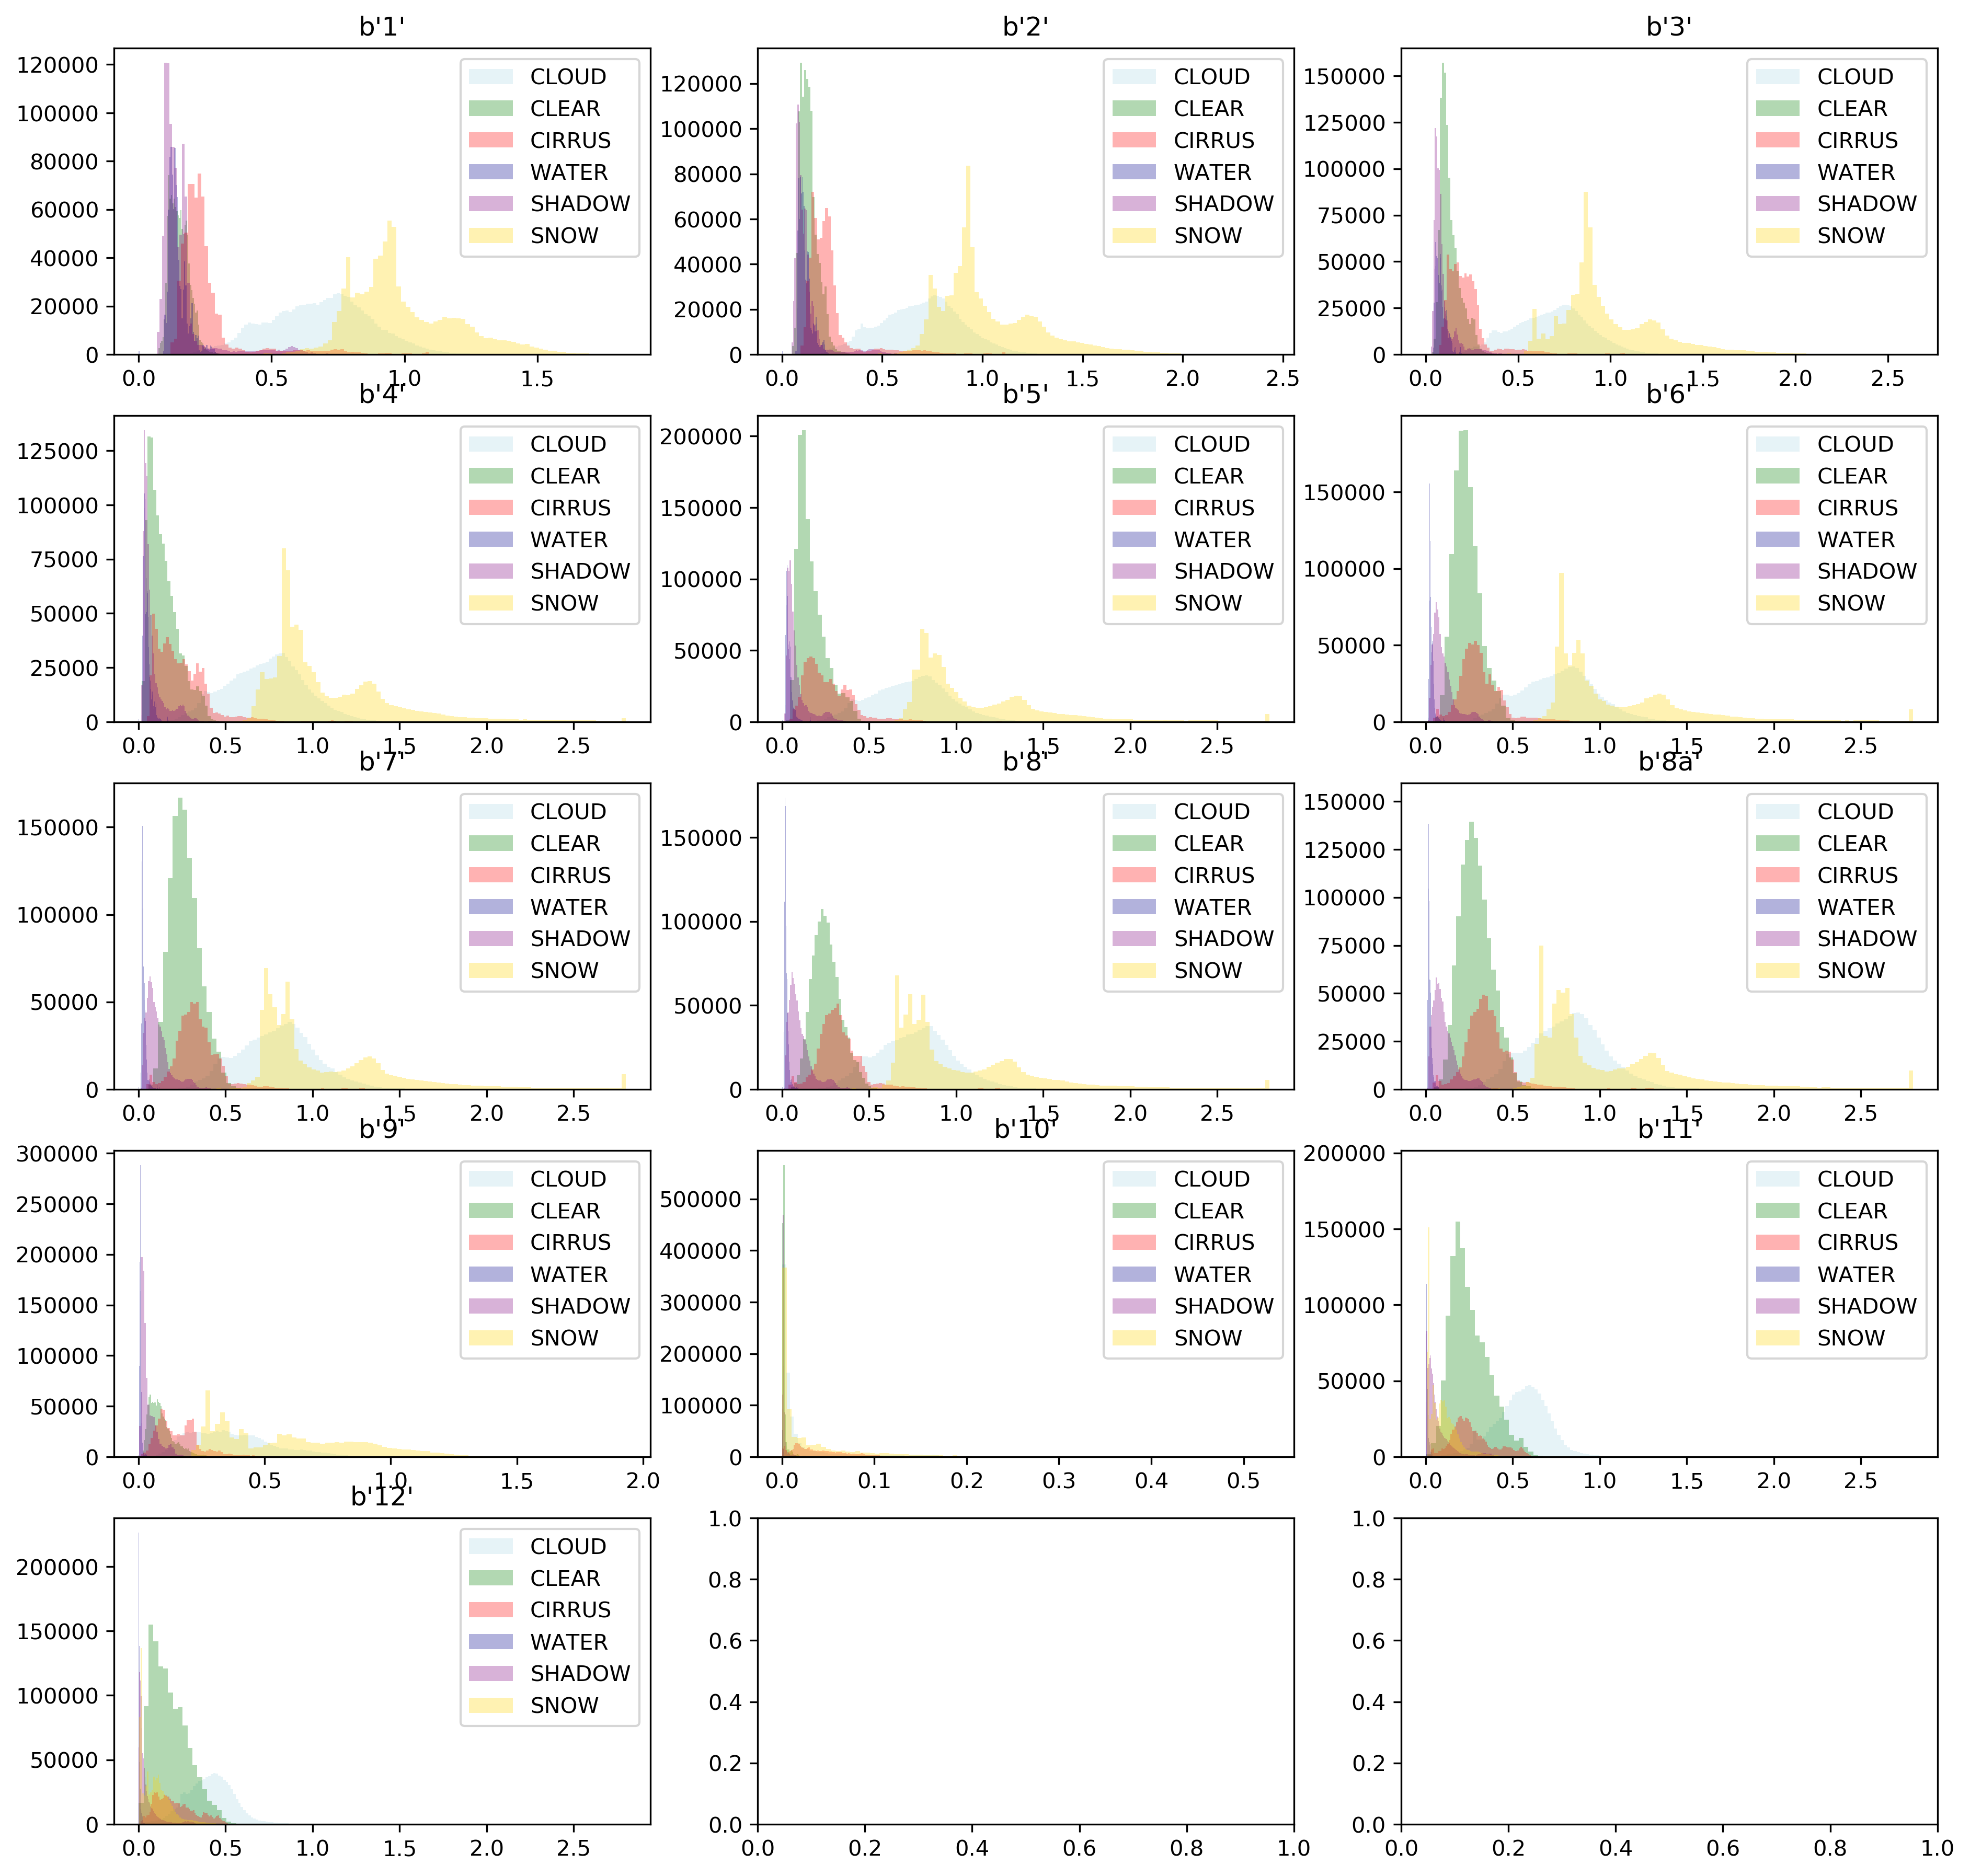

In [30]:
fig, axs = plt.subplots(
    nrows=5, ncols=3, sharex=False, sharey=False, figsize=(15, 15), dpi=300
)
i = 0
while i < band_names.size:
    for key, value in types.items():
        axs.flat[i].hist(
            X[truth == value, i], bins=100, alpha=0.3, color=typ2col[key], label=key
        )

    axs.flat[i].set_title(str(band_names[i]))
    axs.flat[i].legend(loc="upper right")

    i += 1